In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from tqdm import tqdm
from mix_Network import *
from Event import Event

# 1. Loading the events

In [3]:
image_list = [1, 32, 19, 22, 29]
event0 = Event(ImageSize=(32, 32))

event0.LoadFromMat("../Data/alphabet_ExtractedStabilized.mat", image_number=image_list)

# 2. Training

- krnlinit='first' means that the first 4 time-surfaces are used of initialisation of the layers
- with the .run method each event pass by all layers during training (learning of the different layers takes place simultaneously) 

In [8]:
hots = network(algo='lagorce', krnlinit='first')
count = 0
nbevent = int(event0.time.shape[0])
pbar = tqdm(total=nbevent)
while count<nbevent:
    pbar.update(1)
    hots.run(event0.address[count,1],event0.address[count,0],event0.time[count], event0.polarity[count],learn=True, to_record=True)
    count += 1
pbar.close()
for l in range(len(self.L)):
    hots.stats[l].histo = self.L[l].cumhisto.copy()

100%|██████████| 74457/74457 [02:27<00:00, 503.28it/s]


NameError: name 'self' is not defined

In [ ]:
hots.plotlayer()
hots.plotconv()

# 3. Training method including events loading

- this method of learning is inspired from KmeansLagorce and the first layer learns with all the events, then the second layer etc... 
- time-surfaces are filtered for minimum activation (2xR) only in the first layer

In [6]:
hots = network(algo='lagorce', krnlinit='first')
hots.learninglagorce(diginit=True)

100%|██████████| 223371/223371 [06:29<00:00, 573.34it/s] 


## Monitoring

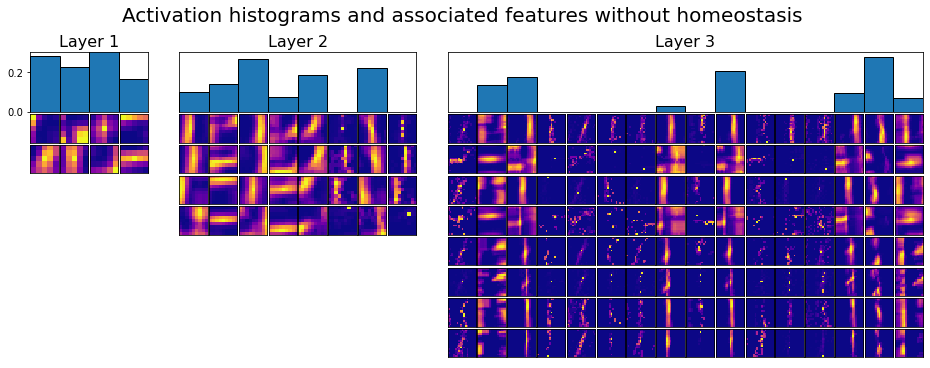

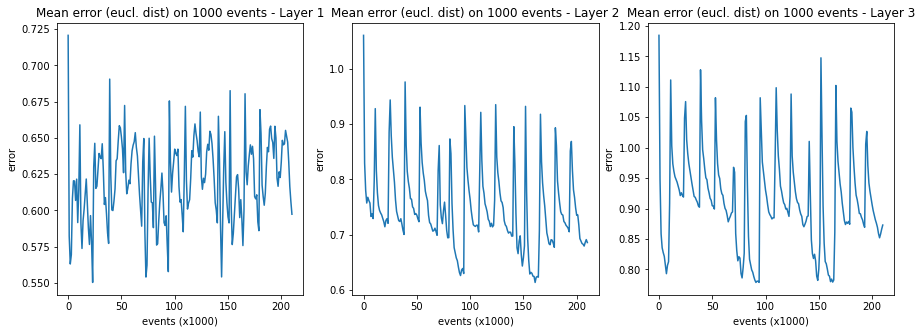

In [7]:
hots.plotlayer()
hots.plotconv()

# 4. Running the trained network on a single image
(you may have to uncommend one line in the .run method of mix_Network)

In [7]:
## Loading and filter an image of a 8
event_sgl = Event(ImageSize=(32, 32))
event_sgl.LoadFromMat("../Data/alphabet_ExtractedStabilized.mat", image_number=22)

In [8]:
for i in range(len(hots.L)):
    hots.TS[i].spatpmat[:] = 0
    hots.TS[i].iev = 0

count = 0
nbevent = int(event_sgl.time.shape[0])
pbar = tqdm(total=nbevent)
while count<nbevent:
    pbar.update(1)     
    hots.run(event0.address[count,1],event0.address[count,0],event0.time[count], event0.polarity[count], to_record=True)
    count += 1
pbar.close()

100%|█████████▉| 14715/14716 [00:22<00:00, 663.03it/s]


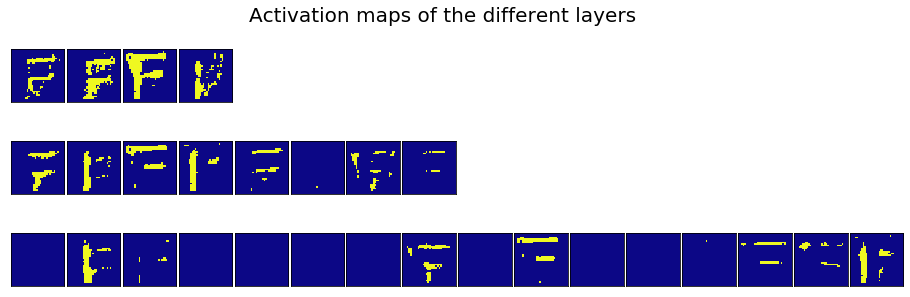

In [9]:
hots.plotactiv()

## Trying harder filtering

In [10]:
for i in range(len(hots.TS)):
    hots.TS[i].spatpmat[:] = 0
    hots.TS[i].iev = 0
    hots.TS[i].filt = 3 #from 2 to 5
    hots.stats[i].actmap[:]=0

count = 0
nbevent = int(event_sgl.time.shape[0])
pbar = tqdm(total=nbevent)
while count<nbevent-1:
    pbar.update(1)
    count += 1
            
    hots.run(event0.address[count,1],event0.address[count,0],event0.time[count], event0.polarity[count], to_record=True)
            
pbar.close()

100%|█████████▉| 14715/14716 [00:22<00:00, 646.56it/s]


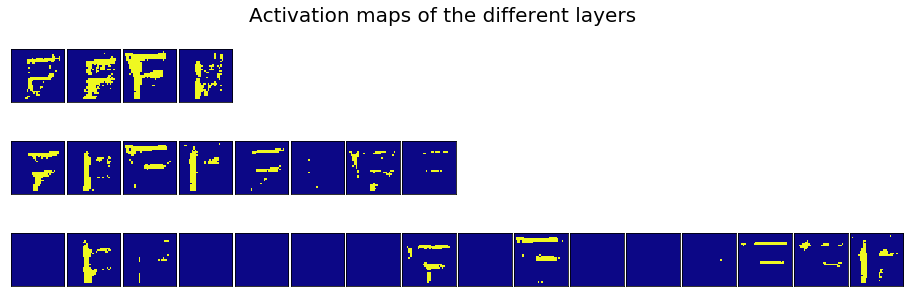

In [11]:
hots.plotactiv()